In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hdfs_path = "hdfs://127.0.0.1:9000/output/"

### Finding Missing Values


To ensure the quality of our data analysis and machine learning processes, it is crucial to address missing and null values appropriately. In order to assess the effectiveness of our data parsing and extraction logic, we need to verify the presence of any null rows in the original dataframe. This step will allow us to determine if there are any incomplete or missing entries that may impact the accuracy and reliability of our analyses. By confirming the absence of null rows, we can proceed with confidence knowing that our data is complete and ready for further analysis.

In [2]:
missing_values_df = pd.read_parquet(os.path.join(hdfs_path, "missing_values"))
missing_values_df.head()

,current_time,host,time,method,endpoint,protocol,status,content_size
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


### Content Size Statistics

In [3]:
content_size_summary_df = pd.read_parquet(os.path.join(hdfs_path, "content_size_summary"))
content_size_summary_df.head()

,min_content_size,max_content_size,mean_content_size,std_content_size,count_content_size
0,3,59998,30048.186446,17361.875635,23964
1,3,59999,30109.814342,17315.677233,23177
2,1,59996,30138.801377,17389.957005,24116
3,2,59996,30249.082701,17408.682478,22914
4,11,59999,29889.895432,17381.660658,22569


### HTTP Status Code Analysis


In [4]:
http_status_df = pd.read_parquet(os.path.join(hdfs_path, "http_status"))
http_status_df.groupby('status').sum().sort_values(by="count", ascending=False)

,count
status,
303,977597
404,977518
200,977474
403,976321
500,975911
304,975695
502,975495


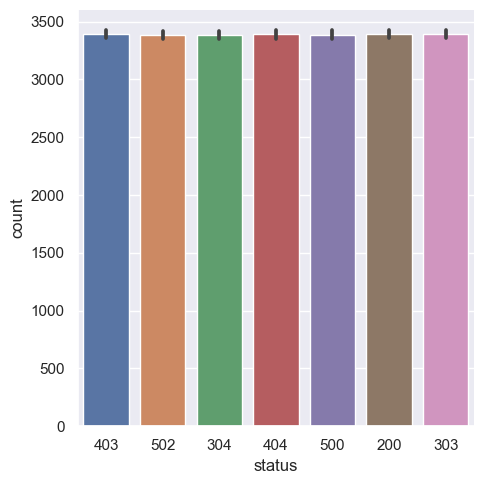

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

status_freq_df = http_status_df.sort_values(by=['count'], ascending=False)
status_freq_df['status'] = status_freq_df['status'].astype(str)
status_freq_df['count'] = status_freq_df['count'].astype(int)

sns.catplot(x='status', y='count', data=status_freq_df, kind='bar')

plt.show()

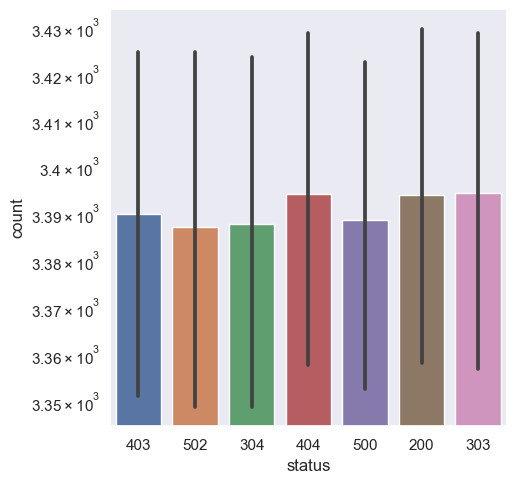

In [6]:
#Since the y-axis labels are not readable, I want to adjust the y-axis labels to be more readable -> using log scale
status_freq_df = http_status_df.sort_values(by=['count'], ascending=False)
status_freq_df['status'] = status_freq_df['status'].astype(str)
status_freq_df['count'] = status_freq_df['count'].astype(int)

sns.catplot(x='status', y='count', data=status_freq_df, kind='bar')

plt.yscale('log')
plt.show()

### Analyzing Frequent Hosts

In [7]:
frequent_hosts_df = pd.read_parquet(os.path.join(hdfs_path, "frequent_hosts"))
frequent_hosts_df.groupby('host').sum().sort_values(by="count", ascending=False).head()

,count
host,
80.2.236.196,2
214.25.186.221,2
79.106.142.153,2
45.93.44.70,2
29.67.7.242,2


### Display the Top 20 Frequent EndPoints


In [8]:
frequent_endPoints_df = pd.read_parquet(os.path.join(hdfs_path, "frequent_endPoints"))
frequent_endPoints_df.groupby('endpoint').sum().sort_values(by="count", ascending=False).head(20)

,count
endpoint,
/Archives/edgar/data/0001675033/000156459021054728/gecc-10q_20210930.htm,9914
/Archives/edgar/data/0000205007/000114554923005577/primary_doc.xml,8916
/Archives/edgar/data/1356093/000088430008000018/0000884300-08-000018.txt,8895
/Archives/edgar/data/0001608293/000119312514225607/g732497g91g62.jpg,8889
/Archives/edgar/data/19411/0001104659-12-037849.txt,8882
/Archives/edgar/data/0001326380/000132638023000019/gme-20230128.htm,8629
/Archives/edgar/data/0000200245/000095010323001599/dp188169_424b2-us2316597.htm,8615
/Archives/edgar/data/0001866295/000110465921080403/tm2117388d5_ex3-32g008.jpg,8426
/Archives/edgar/data/925548/000092153005000094/0000921530-05-000094.txt,8398


### Top Ten Error Endpoints


In [9]:
error_endpoints_df = pd.read_parquet(os.path.join(hdfs_path, "error_endpoints"))
error_endpoints_df.groupby('endpoint').sum().sort_values(by="count", ascending=False).head(10)

,count
endpoint,
/Archives/edgar/data/0001675033/000156459021054728/gecc-10q_20210930.htm,5437
/Archives/edgar/data/925548/000092153005000094/0000921530-05-000094.txt,5200
/Archives/edgar/data/1356093/000088430008000018/0000884300-08-000018.txt,4963
/Archives/edgar/data/0001608293/000119312514225607/g732497g91g62.jpg,4621
/Archives/edgar/data/0001002638/000100263815000016/0001002638-15-000016-index.htm,4569
/Archives/edgar/data/0000205007/000114554923005577/primary_doc.xml,4561
/Archives/edgar/data/0001511737/000151173718000010/0001511737-18-000010-index.htm,4314
/Archives/edgar/data/0000101382/000156459018002843/umbf-10k_20171231.htm,4166
/Archives/edgar/data/19411/0001104659-12-037849.txt,4132


### Total number of Unique Hosts


In [10]:
unique_hosts_df = pd.read_parquet(os.path.join(hdfs_path, "unique_hosts"))
unique_hosts_df.count()

host    6835992
dtype: int64

### Number of Unique Daily Hosts

In [11]:
unique_daily_hosts_df = pd.read_parquet(os.path.join(hdfs_path, "unique_daily_hosts"))
unique_daily_hosts_df.groupby('day').sum().sort_index(ascending=True)

,count
day,
1,225227
2,224499
3,224119
4,224233
5,224738
6,224910
7,224510
8,224198
9,224461


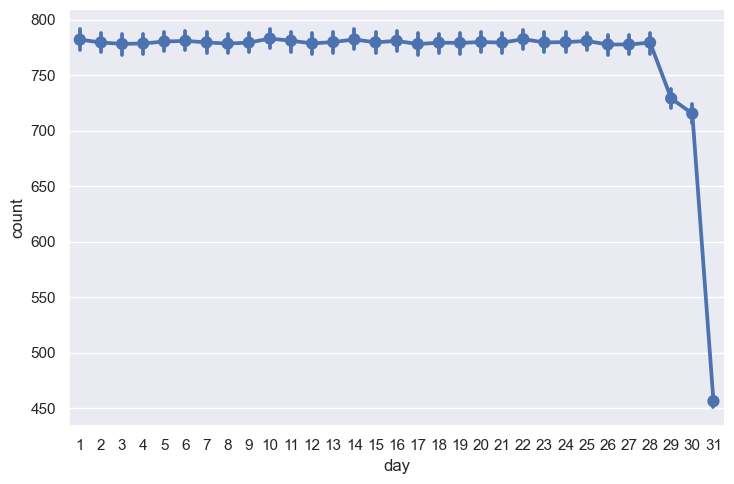

In [12]:
c = sns.catplot(x='day', y='count', 
                data=unique_daily_hosts_df, 
                kind='point', height=5, 
                aspect=1.5)

### Average Number of Daily Requests per Host


In [13]:
avg_daily_requests_per_host_df = pd.read_parquet(os.path.join(hdfs_path, "avg_daily_reqests_per_host"))
total_df = avg_daily_requests_per_host_df.groupby('day').sum()[['total_reqs', 'total_hosts']]
total_df['avg_reqs'] = total_df['total_reqs'] / total_df['total_hosts']
total_df

,total_reqs,total_hosts,avg_reqs
day,,,
1,225227,225227,1.0
2,224499,224499,1.0
3,224119,224119,1.0
4,224233,224233,1.0
5,224738,224738,1.0
6,224910,224910,1.0
7,224510,224510,1.0
8,224198,224198,1.0
9,224461,224461,1.0


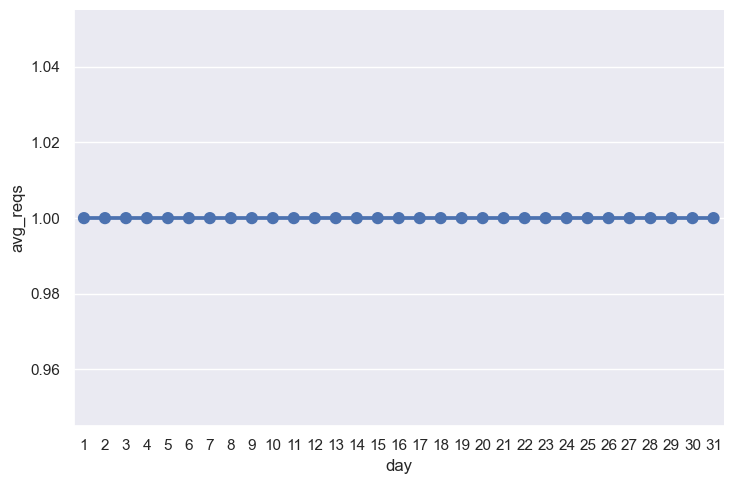

In [14]:
c = sns.catplot(x='day', y='avg_reqs', 
                data=total_df.reset_index(), 
                kind='point', height=5, aspect=1.5)

### Listing the Top Twenty 404 Response Code Endpoints


In [15]:
endpoints_404_count_df = pd.read_parquet(os.path.join(hdfs_path, "endpoints_404_count"))
endpoints_404_count_df.groupby('endpoint').sum().sort_values('count', ascending=False).head(20)

,count
endpoint,
/Archives/edgar/data/0001795772/000121390021017160/s131128_10k.htm,6739
/Archives/edgar/data/0001729361/000121390021017176/s131100_10k.htm,6710
/Archives/edgar/data/0001801390/000121390021017183/s131106_10k.htm,6668
/Archives/edgar/data/0001439124/000129281422000854/,6660
/Archives/edgar/data/921112/000089542110000396/0000895421-10-000396.txt,6647
/Archives/edgar/data/0000004281/000119312517062657/R97.htm,6638
/Archives/edgar/data/0001724128/000121390021017151/s131120_10k.htm,6635
/Archives/edgar/data/2178/0000002178-12-000028.txt,6632
/Archives/edgar/data/0001852440/000000000022002912/filename2.txt,6630


### Listing the Top Twenty 404 Response Code Hosts


In [16]:
hosts_404_count_df = pd.read_parquet(os.path.join(hdfs_path, "hosts_404_count_df"))
hosts_404_count_df.groupby('host').sum().sort_values(by=['count'], ascending=False).head(20)

,count
host,
223.219.55.153,2
39.22.71.186,2
210.9.28.93,2
183.210.147.165,2
89.72.37.56,2
184.99.23.10,2
166.100.157.113,2
122.24.145.52,2
84.255.6.228,2


### Visualizing 404 Errors per Day


In [17]:
errors_by_date_sorted_df = pd.read_parquet(os.path.join(hdfs_path, "errors_by_date_sorted"))
errors_by_date_sorted_df.groupby('day').sum().sort_index(ascending=True)

,count
day,
1,32137
2,32197
3,32265
4,31818
5,32156
6,32151
7,32084
8,32081
9,32175


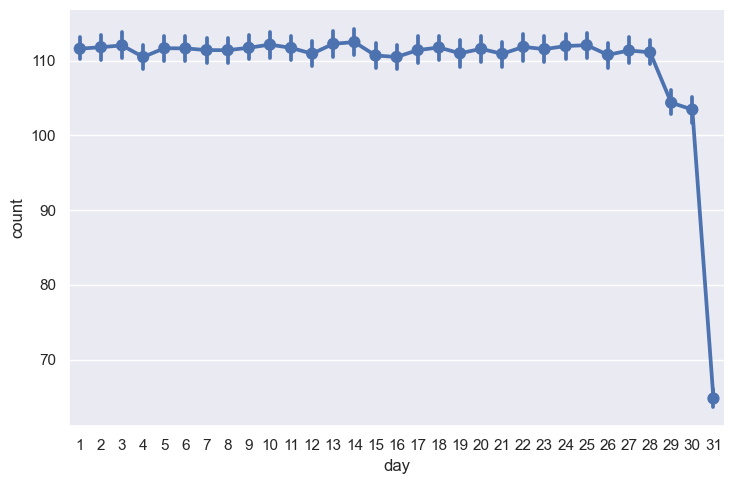

In [18]:
c = sns.catplot(x='day', y='count', 
                data=errors_by_date_sorted_df, 
                kind='point', height=5, aspect=1.5)

### Visualizing Hourly 404 Errors

In [19]:
hourly_avg_errors_sorted_df = pd.read_parquet(os.path.join(hdfs_path, "hourly_avg_errors_sorted"))
hourly_avg_errors_sorted_df.groupby('hour').sum().sort_index(ascending=True)

,count
hour,
0,40553
1,41057
2,40449
3,40854
4,40518
5,40778
6,40632
7,40669
8,40846


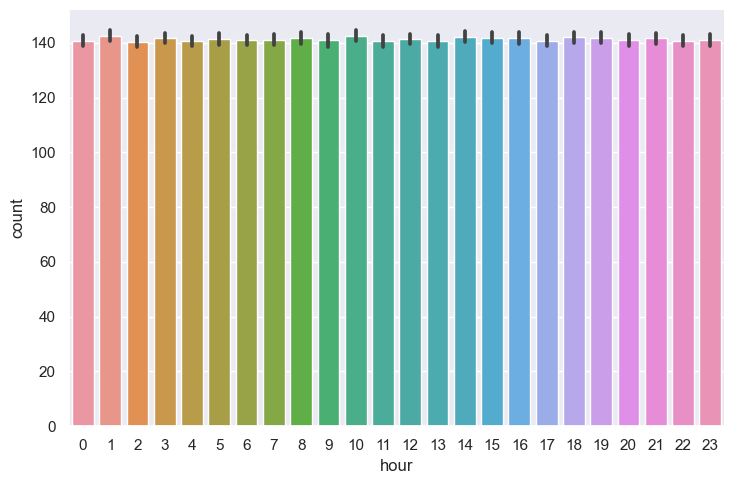

In [20]:
c = sns.catplot(x='hour', y='count', 
                data=hourly_avg_errors_sorted_df, 
                kind='bar', height=5, aspect=1.5)